# Forecasting 1 time step


This function creates as many time series as requested (via the batch_size argument), each of length n_steps, and there is just one value per time step in each series (i.e., all series are univariate). The function returns a NumPy array of shape [batch size, time steps, 1], where each series is the sum of two sine waves of fixed amplitudes but random frequencies and phases, plus a bit of noise.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def generate_time_series(batch_size, n_steps):
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))     # wave 1
    series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))    # wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)      # noise
    return series[..., np.newaxis].astype(np.float32)

def plot_time_series(batch_size, series): 
    plt.figure(figsize=(10, 6))
    for i in range(batch_size):
        plt.plot(series[i, :, 0], label=f'Série {i+1}')

    plt.xlabel("Passo de tempo")
    plt.ylabel("Valor da série")
    plt.title("Visualização das Séries Temporais Geradas")
    plt.legend(loc="upper right", fontsize=8)
    plt.show()          

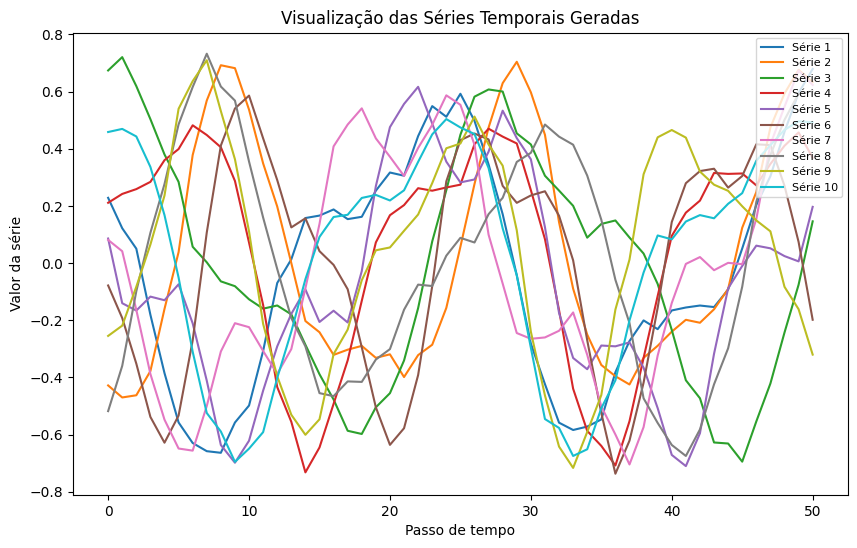

In [3]:
n_steps = 50
batch_size = 10000
series = generate_time_series(batch_size, n_steps + 1)
plot_time_series(10, series)

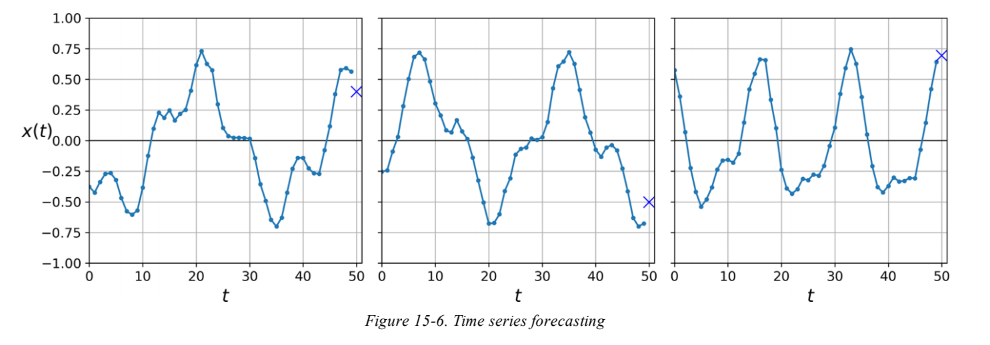

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
import keras

y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

2025-02-04 03:25:19.270840: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-04 03:25:23.301245: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-04 03:25:25.142914: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738639527.918748    2700 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738639528.583971    2700 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 03:25:36.948839: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

np.float32(0.020799238)

In [6]:
def compile_model(model):
    # Compiling the model
    model.compile(loss="mse", optimizer="adam")

    # Training the model
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

    # Evaluating the model
    mse = model.evaluate(X_valid, y_valid)
    print(f"Validation MSE: {mse:.4f}")

In [7]:
model_RNA = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[50, 1]),
        keras.layers.Dense(1)
])
model_RNN = keras.models.Sequential([
        keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

complex_RNN = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.SimpleRNN(20, return_sequences=True),
        keras.layers.SimpleRNN(1)
])

complex_dense_RNN  = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.SimpleRNN(20),
        keras.layers.Dense(1)
])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


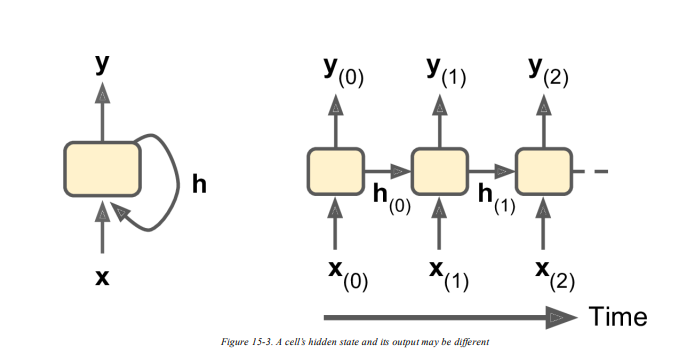

by default, the SimpleRNN layer uses the hyperbolic tangent activation function. It works exactly as we
saw earlier: the initial state h is set to 0, and it is passed to a single recurrent neuron, along with the value of the first time step, x . The neuron computes a weighted sum of these values and applies the hyperbolic tangent activation function to the result, and this gives the first output, y . In a simple RNN, this output is also the new state h . This new state is passed to the same recurrent neuron along with the next input value, x , and the process is repeated until the last time step. Then the layer just outputs the last value, y . All of this is performed simultaneously for every time series.


In [8]:
compile_model(model_RNN)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0206 - val_loss: 0.0136
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0128 - val_loss: 0.0118
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0112 - val_loss: 0.0116
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0116 - val_loss: 0.0115
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0116 - val_loss: 0.0115
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0114 - val_loss: 0.0115
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0112 - val_loss: 0.0114
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0112 - val_loss: 0.0114
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0112 - val_loss: 0.0114
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0115 - val_loss: 0.0114
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/s

In [9]:
compile_model(model_RNA)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2891 - val_loss: 0.0888
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0736 - val_loss: 0.0455
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0394 - val_loss: 0.0264
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0239 - val_loss: 0.0175
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0160 - val_loss: 0.0132
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0132 - val_loss: 0.0109
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 - val_loss: 0.0095
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096 - val_loss: 0.0085
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087 - val_loss: 0.0076
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0078 - val_loss: 0.0069
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069 - val_loss: 0.0063
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [10]:
compile_model(complex_RNN)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0693 - val_loss: 0.0073
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0060 - val_loss: 0.0048
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0033 - val_loss: 0.0038
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 

In [11]:
compile_model(complex_dense_RNN)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0424 - val_loss: 0.0045
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0027 - val_loss: 0.0032
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 

# Forecasting several time steps ahead

##  Sequence to vector model


The first option is to use the model we already trained, make it predict the next value, then add that value to the inputs (acting as if this predicted value had actually occurred), and use the model again to predict the following value, and so on, as in the following code:

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

steps_ahead = 10

series = generate_time_series(1, n_steps + steps_ahead)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(steps_ahead):
    y_pred_one_step = model_RNN.predict(X[:, step_ahead:])[:, np.newaxis]
    X = np.concatenate([X, y_pred_one_step], axis=1)
    
Y_pred = X[:, n_steps:]
print(mean_squared_error(Y_new[0], Y_pred[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0.42105430364608765


In [81]:
def plot_time_series(series, X):
    plt.figure(figsize=(10, 6))
    for i in range(1):
        plt.plot(series[i, :, 0], label=f'Original ')
        plt.plot(X[i, :, 0], label='Forecast', color='red', linestyle='dashed')


    plt.xlabel("Passo de tempo")
    plt.ylabel("Valor da série")
    plt.title("Visualização das Séries Temporais Geradas")
    plt.legend(loc="upper right", fontsize=8)
    plt.show() 

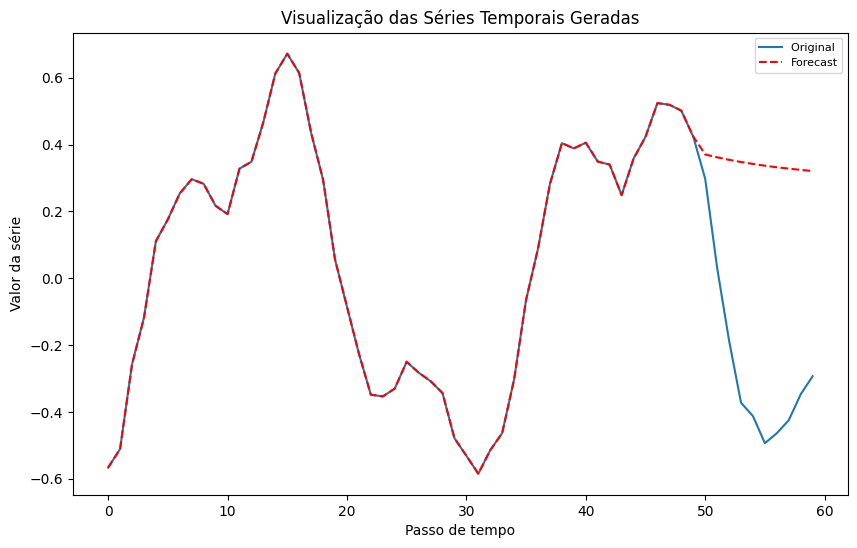

In [82]:
plot_time_series(series, X)

The second option is to train an RNN to predict all 10 next values at once. We can still use a sequence-to-vector
model, but it will output 10 values instead of 1. However, we first need to change the targets to be vectors
containing the next 10 value

In [83]:
model = keras.models.Sequential([
keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
keras.layers.SimpleRNN(20),
keras.layers.Dense(10)
])
Y_pred = model.predict(X_new)
print(mean_squared_error(Y_new[0], Y_pred[0]))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
0.21735402941703796


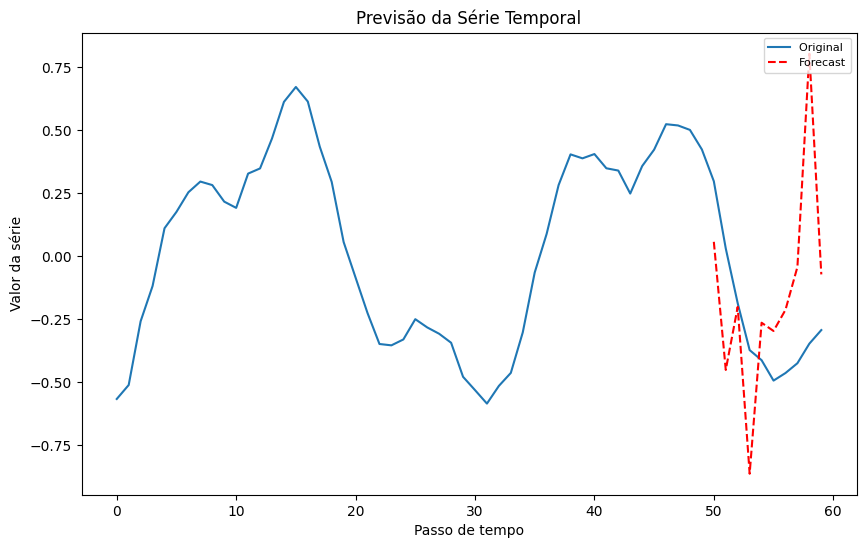

In [84]:
future_axis = np.arange(n_steps, n_steps + steps_ahead)  # Tempo futuro

plt.figure(figsize=(10, 6))
plt.plot(series[0, :, 0], label=f'Original ')
plt.plot(future_axis, Y_pred[0], label='Forecast', color='red', linestyle='dashed')

plt.xlabel("Passo de tempo")
plt.ylabel("Valor da série")
plt.title("Previsão da Série Temporal")
plt.legend(loc="upper right", fontsize=8)
plt.show()
